# **Importing Libiraries**

In [ ]:
NUMBER_EPOCHS = 500

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , InputLayer , Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2


# **Load Dataset**

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)

# **Feature Engineering**

In [ ]:
sc = StandardScaler()

In [ ]:
X_train_scaler = sc.fit_transform(X_train)
X_test_scaler = sc.transform(X_test)

# **Model**

In [ ]:

model = Sequential([
     Dense(64, activation='relu', input_shape=(X_train_scaler.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [ ]:
model.compile(optimizer=Adam(lr=0.01), loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 64)                896       
                                                                 
 dense_42 (Dense)            (None, 64)                4160      
                                                                 
 dense_43 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train_scaler, y_train, epochs=NUMBER_EPOCHS, verbose=1)

Epoch 1/500
13/13 [==============================] - 0s 2ms/step - loss: 548.5874
Epoch 2/500
13/13 [==============================] - 0s 1ms/step - loss: 490.2284
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 417.1006
Epoch 4/500
13/13 [==============================] - 0s 2ms/step - loss: 317.1161
Epoch 5/500
13/13 [==============================] - 0s 1ms/step - loss: 202.3116
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 103.0341
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 52.1625
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 37.9289
Epoch 9/500
13/13 [==============================] - 0s 2ms/step - loss: 29.7455
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 24.7217
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 22.2896
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 20.6887
Epoch 13/500
13/13 

In [ ]:
loss = model.evaluate(X_test_scaler, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 12.7154


In [ ]:
y_pred_train = model.predict(X_train_scaler)
y_pred_test = model.predict(X_test_scaler)

4/4 [==============================] - 0s 2ms/step


In [ ]:
print("Train MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Train R2 Score:", r2_score(y_train, y_pred_train))
print("Test R2 Score:", r2_score(y_test, y_pred_test))

Train MSE: 1.462589260520009
Test MSE: 12.715373023174063
Train R2 Score: 0.9827162570895637
Test R2 Score: 0.8472514996690761


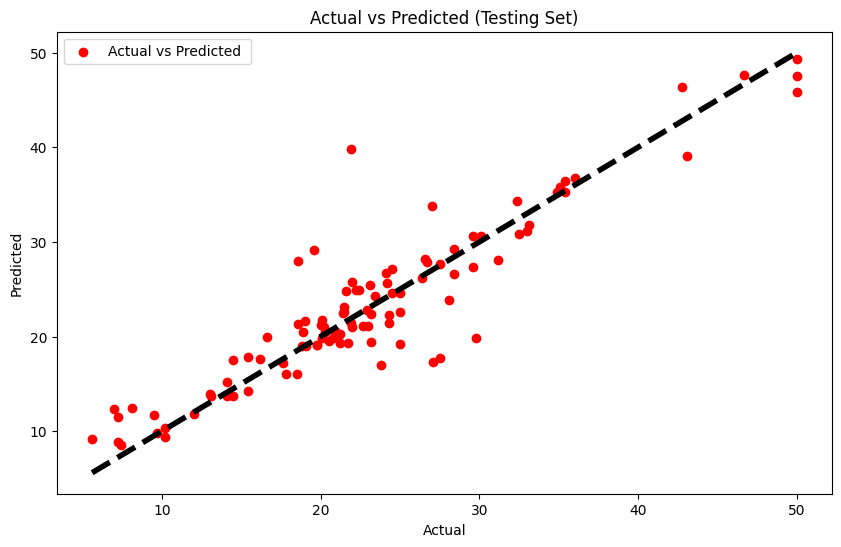

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='red', label='Actual vs Predicted ')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.legend()
plt.show()


In [ ]:
train_residuals = y_train - np.squeeze(y_pred_train)
test_residuals = y_test -  np.squeeze(y_pred_test)

In [ ]:
train_residuals.shape ,np.squeeze(y_pred_train).shape , y_train.shape

((404,), (404,), (404,))

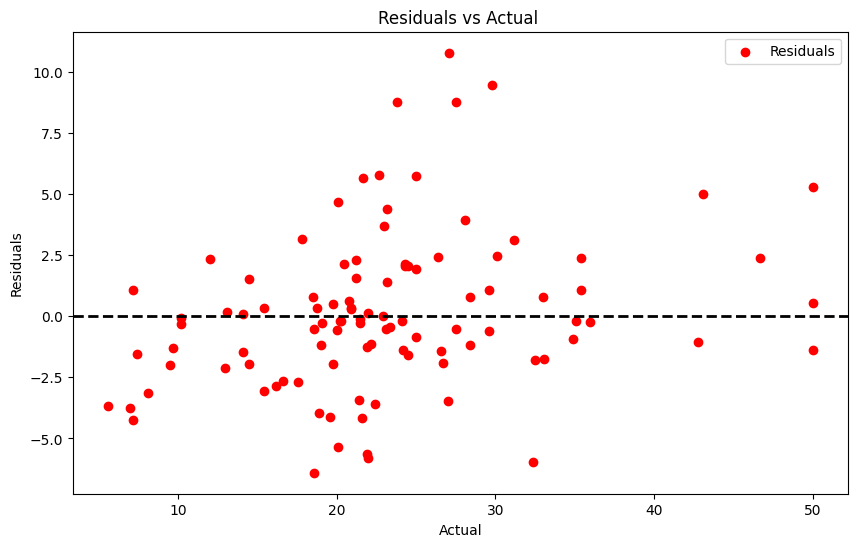

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_residuals, color='red', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals vs Actual ')
plt.legend()
plt.show()
